<h2 style = 'color: purple' align='center'>Irys Flower Predict With K Mean Cluster<h2>

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

irys = load_iris()

In [24]:
irys.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
irys.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [31]:
df = pd.DataFrame(irys.data,columns=irys.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
petal = df.drop(['sepal length (cm)','sepal width (cm)'],axis='columns')
petal.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Text(0, 0.5, 'petal width (cm)')

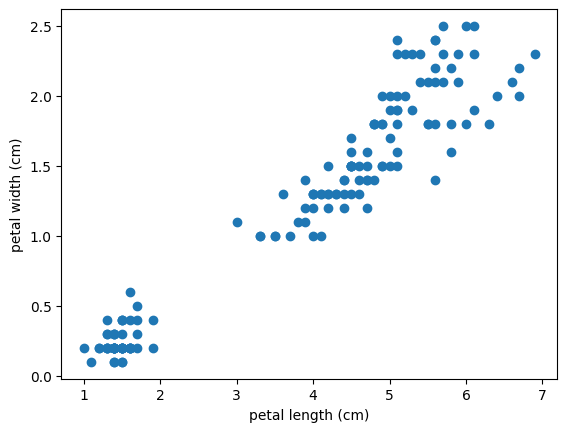

In [33]:
plt.scatter(petal['petal length (cm)'],petal['petal width (cm)'])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [37]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(petal[['petal length (cm)','petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [39]:
petal['cluster'] = y_predicted
petal.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [ ]:
petal_1 = petal[petal.cluster == 0]
petal_2 = petal[petal.cluster == 1]
petal_3 = petal[petal.cluster == 2]

In [42]:
km.cluster_centers_

array([[5.62608696, 2.04782609],
       [1.462     , 0.246     ],
       [4.29259259, 1.35925926]])

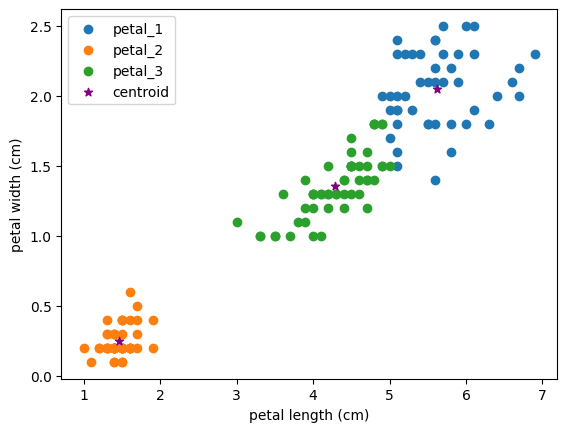

In [43]:
plt.scatter(petal_1['petal length (cm)'],petal_1['petal width (cm)'],label ='petal_1')
plt.scatter(petal_2['petal length (cm)'],petal_2['petal width (cm)'],label ='petal_2')
plt.scatter(petal_3['petal length (cm)'],petal_3['petal width (cm)'],label = 'petal_3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

Elbow Chart

In [45]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(petal[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

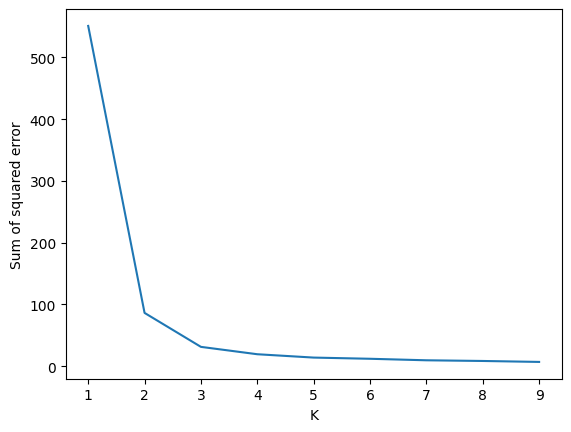

In [46]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

Real target clusters 

In [51]:
petal['flower'] = irys.target
petal.head()

,petal length (cm),petal width (cm),cluster,target,flower
0,1.4,0.2,1,0,0
1,1.4,0.2,1,0,0
2,1.3,0.2,1,0,0
3,1.5,0.2,1,0,0
4,1.4,0.2,1,0,0


In [52]:
setosa = petal[petal.flower == 0]
versicolor = petal[petal.flower== 1]
virginica = petal[petal.flower == 2]

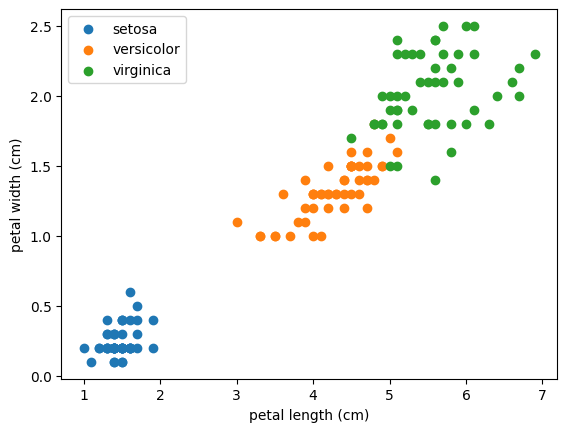

In [53]:
plt.scatter(setosa['petal length (cm)'],setosa['petal width (cm)'],label ='setosa')
plt.scatter(versicolor['petal length (cm)'],versicolor['petal width (cm)'],label ='versicolor')
plt.scatter(virginica['petal length (cm)'],virginica['petal width (cm)'],label = 'virginica')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()

As we can observe the real clusters and the predicted clusters are almost the same